# Importing libraries, Downloading and reading data in Google Colab

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash
!pip3 install pandas_summary
! pip install fastai==0.7.0

In [0]:
!curl 'https://cdn.skillenza.com/files/de472922-645b-4bbf-aee4-9cbfee9b93d9/training_data_.csv' -H 'User-Agent: Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:69.0) Gecko/20100101 Firefox/69.0' -H 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'Connection: keep-alive' -H 'Referer: https://skillenza.com/challenge/rapido-recruitmentdrive-datascientist-machinelearningengineer-august/checkpoint/submit/1784' -H 'Cookie: _ga=GA1.2.1778547320.1565265892; _hjid=8c788acc-d536-49ca-ad54-9b1baf038076; G_ENABLED_IDPS=google; _gid=GA1.2.210378034.1569058731' -H 'Upgrade-Insecure-Requests: 1' -o train.csv
!curl 'https://cdn.skillenza.com/files/76a9463f-9ba4-43c8-b91a-dc737c6695c7/test_data.csv' -H 'User-Agent: Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:69.0) Gecko/20100101 Firefox/69.0' -H 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'Connection: keep-alive' -H 'Referer: https://skillenza.com/challenge/rapido-recruitmentdrive-datascientist-machinelearningengineer-august/checkpoint/submit/1784' -H 'Cookie: _ga=GA1.2.1778547320.1565265892; _hjid=8c788acc-d536-49ca-ad54-9b1baf038076; G_ENABLED_IDPS=google; _gid=GA1.2.210378034.1569058731' -H 'Upgrade-Insecure-Requests: 1' -o test.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.2M  100 10.2M    0     0  21.5M      0 --:--:-- --:--:-- --:--:-- 21.5M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1392k    0 1392k    0     0  6300k      0 --:--:-- --:--:-- --:--:-- 6300k


In [0]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline

In [0]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display

from sklearn import metrics

In [0]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [0]:
df_raw = pd.read_csv("train.csv", low_memory=False)
df_raw.columns = df_raw.columns.str.lstrip()
test_data = pd.read_csv("test.csv", low_memory=False)
test_data.columns = test_data.columns.str.lstrip()

# Taking a look at data

In [17]:
display_all(df_raw.tail(5).T)

,28781,28782,28783,28784,28785
url_id,39638.000000,39639.000000,39641.000000,39642.000000,39643.000000
timedelta,8.000000,8.000000,8.000000,8.000000,8.000000
n_tokens_title,13.000000,11.000000,12.000000,10.000000,6.000000
n_tokens_content,1629.000000,223.000000,328.000000,442.000000,682.000000
n_unique_tokens,0.425711,0.653153,0.696296,0.516355,0.539493
n_non_stop_words,1.000000,1.000000,1.000000,1.000000,1.000000
n_non_stop_unique_tokens,0.606092,0.825758,0.885057,0.644128,0.692661
num_hrefs,15.000000,5.000000,9.000000,24.000000,10.000000
num_self_hrefs,12.000000,3.000000,7.000000,1.000000,1.000000
num_imgs,6.000000,1.000000,3.000000,12.000000,1.000000


In [18]:
df_raw.describe()

,url_id,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.00000,28786.000000,28786.000000,28786.000000
mean,19878.678524,353.520635,10.403460,546.455082,0.555111,1.006600,0.695780,10.873063,3.301674,4.548496,1.259432,4.550483,7.224449,0.053186,0.177691,0.157229,0.058674,0.185681,0.213541,25.917529,1170.187296,313.969191,13741.614431,752845.153894,259488.803305,1119.117710,5661.950910,3136.457660,3959.137988,10180.309566,6328.304836,0.166782,0.186653,0.189224,0.183631,0.144098,0.061905,0.067707,0.129612,0.184370,0.141474,0.216478,0.223049,0.234595,0.443485,0.118936,0.039636,0.016630,0.682098,0.288165,0.353350,0.095110,0.756500,-0.260026,-0.522700,-0.107939,0.282659,0.07220,0.341162,0.156628,3428.658549
std,11461.174637,214.420324,2.121334,470.409467,4.130828,6.138155,3.830214,11.155409,3.868232,8.342588,4.183587,0.842057,1.909620,0.224407,0.382259,0.364023,0.235018,0.388855,0.409814,69.422533,4110.419484,638.580354,58488.942267,213664.134603,135157.683564,1137.505117,6167.654463,1318.413527,19217.142024,39839.079255,23775.239191,0.372788,0.389640,0.391693,0.387190,0.351195,0.240987,0.251246,0.335881,0.263121,0.219639,0.282305,0.294676,0.289643,0.116509,0.096983,0.017406,0.010841,0.190535,0.156808,0.104192,0.070577,0.247865,0.127850,0.290469,0.095253,0.323911,0.26614,0.189085,0.226958,12693.940388
min,1.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.00000,0.000000,0.000000,1.000000
25%,9916.250000,163.000000,9.000000,245.000000,0.470735,1.000000,0.625926,4.000000,1.000000,1.000000,0.000000,4.480429,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,446.250000,141.800000,0.000000,843300.000000,172800.000000,0.000000,3560.441280,2383.855650,637.000000,1100.000000,980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [19]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

LDA_00                           0.0
LDA_01                           0.0
LDA_02                           0.0
LDA_03                           0.0
LDA_04                           0.0
abs_title_sentiment_polarity     0.0
abs_title_subjectivity           0.0
average_token_length             0.0
avg_negative_polarity            0.0
avg_positive_polarity            0.0
data_channel_is_bus              0.0
data_channel_is_entertainment    0.0
data_channel_is_lifestyle        0.0
data_channel_is_socmed           0.0
data_channel_is_tech             0.0
data_channel_is_world            0.0
global_rate_negative_words       0.0
global_rate_positive_words       0.0
global_sentiment_polarity        0.0
global_subjectivity              0.0
is_weekend                       0.0
kw_avg_avg                       0.0
kw_avg_max                       0.0
kw_avg_min                       0.0
kw_max_avg                       0.0
kw_max_max                       0.0
kw_max_min                       0.0
k

# Trying to fit first model

## Looking at skewness or outlier position of some features

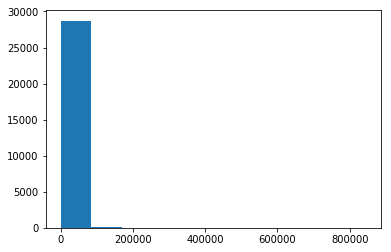

In [20]:
plt.hist(df_raw['shares']);

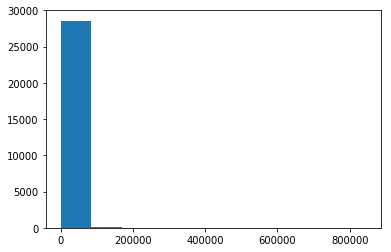

In [21]:
plt.hist(df_raw['self_reference_avg_sharess']);

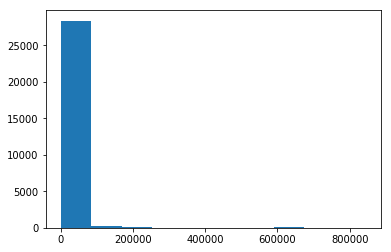

In [22]:
plt.hist(df_raw['self_reference_max_shares']);

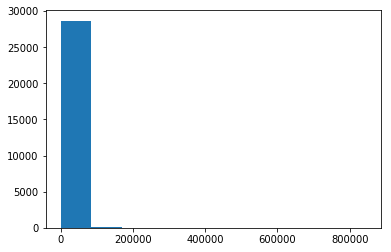

In [23]:
plt.hist(df_raw['self_reference_min_shares']);

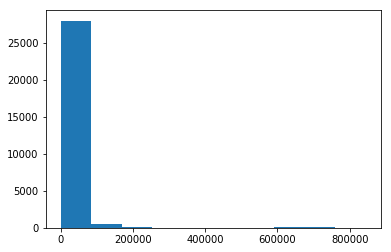

In [24]:
plt.hist(df_raw['kw_min_max']);

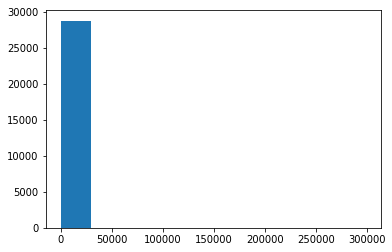

In [25]:
plt.hist(df_raw['kw_max_min']);

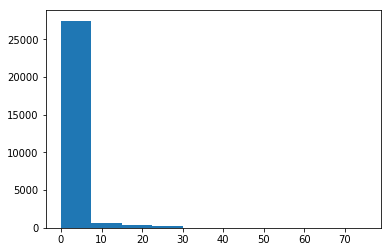

In [26]:
plt.hist(df_raw['num_videos']);

In [0]:
# Removing n_unique_token = 0 rows,
df_raw = df_raw[df_raw['n_unique_tokens'] > 0.0]
# df_raw['shares'] = np.log(df_raw['shares'])
# df_raw['self_reference_avg_sharess'] = np.log(df_raw['self_reference_avg_sharess'])
# df_raw['self_reference_max_shares'] = np.log(df_raw['self_reference_max_shares'])
# df_raw['self_reference_min_shares'] = np.log(df_raw['self_reference_min_shares'])
# df_raw['kw_min_max'] = np.log(df_raw['kw_min_max'])
# df_raw['kw_max_min'] = np.log(df_raw['kw_max_min'])
# df_raw['num_videos'] = np.log(df_raw['num_videos'])

In [0]:
def outliers_indices(feature):

    mid = df_raw[feature].mean()
    sigma = df_raw[feature].std()
    return df_raw[(df_raw[feature] < mid - 3*sigma) | (df_raw[feature] > mid + 3*sigma)].index

In [0]:
for i in range(0,6):
  wrong_share = outliers_indices('shares')
  wrong_vid = outliers_indices('num_videos')
  wrong_img = outliers_indices('num_imgs')
  wrong_content = outliers_indices('n_tokens_content')
  wrong_title = outliers_indices('n_tokens_title')
  wrong_self_reference_avg_sharess = outliers_indices('self_reference_avg_sharess')
  wrong_self_reference_max_shares = outliers_indices('self_reference_max_shares')
  wrong_self_reference_min_shares = outliers_indices('self_reference_min_shares')
  wrong_kw_max_min = outliers_indices('kw_max_min')
  wrong_kw_min_max = outliers_indices('kw_min_max')
  out = set(wrong_share) | set(wrong_vid) | set(wrong_img) | set(wrong_content) | set(wrong_title) | set(wrong_self_reference_avg_sharess) | \
  set(wrong_self_reference_max_shares) | set(wrong_self_reference_min_shares) | set(wrong_kw_max_min) | set(wrong_kw_min_max)
  df_raw.drop(out, inplace=True)

In [0]:
to_keep1 = ['url_id', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity']
to_keep2 = ['kw_avg_avg', 'self_reference_min_shares', 'kw_avg_min', 'kw_avg_max', 'n_unique_tokens', 'is_weekend', 'kw_avg_max',
           'global_subjectivity', 'self_reference_max_shares', 'LDA_00', 'self_reference_avg_sharess', 'average_token_length',
           'kw_avg_min', 'num_hrefs', 'global_rate_positive_words', 'data_channel_is_entertainment', 'avg_negative_polarity',
           'LDA_02', 'global_rate_negative_words', 'avg_positive_polarity']
df = df_raw[to_keep1]
y = np.log(df_raw['shares'])

## Model Training & Feature Importance

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train , y_valid = train_test_split(df, y, test_size=0.20, random_state=2019)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((8696, 59), (8696,), (2175, 59), (2175,))

In [0]:
def mape(y_pred, y_true):
  "mean_absolute_percentage_error"
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  return (1-(mape/100)) * 100

def rmse(x,y): return np.sqrt(((x-y)**2).mean())

def print_score(m):
  res = [mape(np.exp(m.predict(X_train)), np.exp(y_train)), mape(np.exp(m.predict(X_valid)), np.exp(y_valid)),
         m.score(X_train, y_train), m.score(X_valid, y_valid), rmse(np.exp(m.predict(X_train)), np.exp(y_train)),
         rmse(np.exp(m.predict(X_valid)), np.exp(y_valid))]
  if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
  print(res)

In [41]:
m = RandomForestRegressor(n_jobs=-1, max_features=0.3, n_estimators=40, oob_score=True, random_state=2019, max_depth=30, min_samples_leaf=4)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 3.82 s, sys: 5.91 ms, total: 3.83 s
Wall time: 1.98 s
[75.06501091254214, 56.639566489885176, 0.7082990556113572, 0.17336279893635032, 536.6439045203841, 805.3712575795698, 0.15823457508742889]


In [42]:
fi = rf_feat_importance(m, df); fi

,cols,imp
0,url_id,0.050934
26,kw_avg_avg,0.049939
1,timedelta,0.039213
25,kw_max_avg,0.035561
42,LDA_04,0.032958
37,is_weekend,0.030521
40,LDA_02,0.029846
27,self_reference_min_shares,0.029363
38,LDA_00,0.028704
29,self_reference_avg_sharess,0.027995


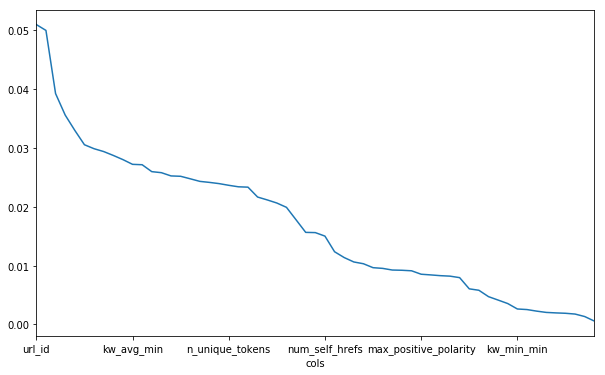

In [43]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

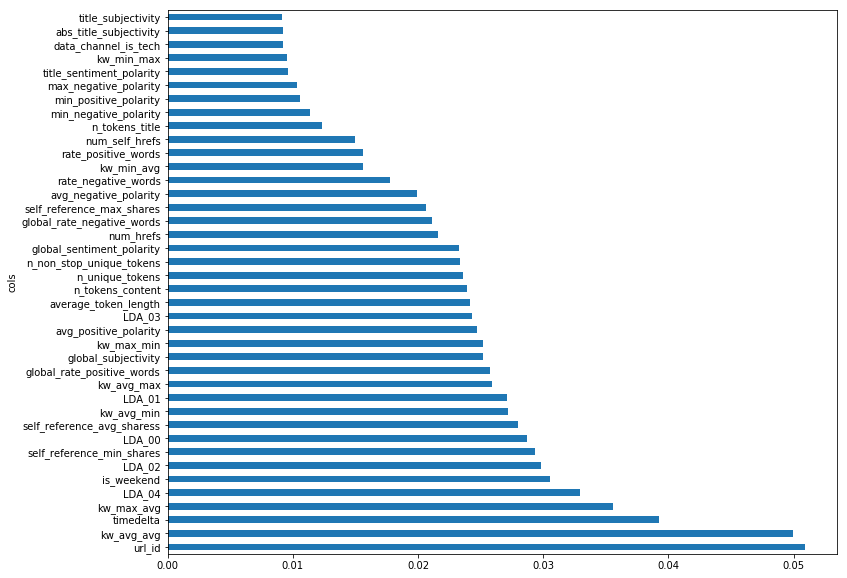

In [44]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,10), legend=False)
plot_fi(fi[:40]);

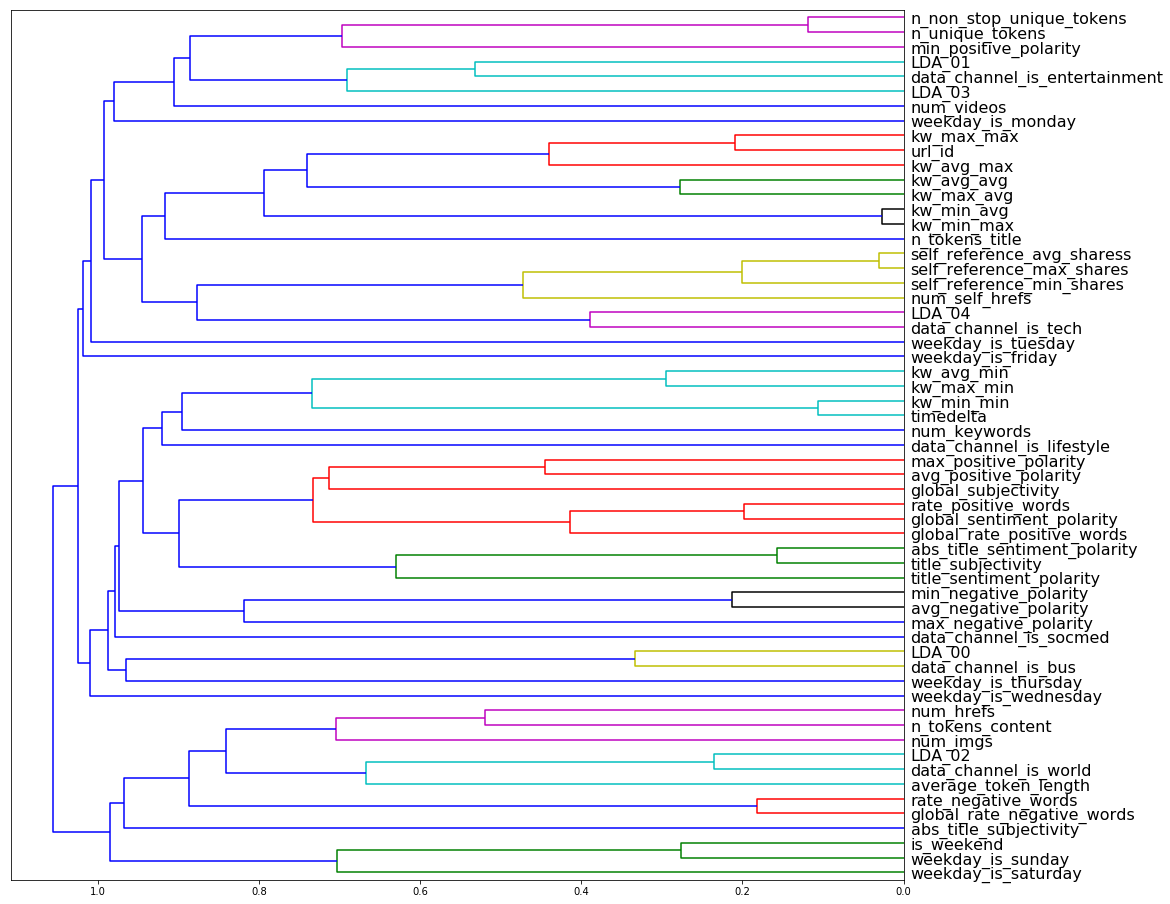

In [45]:
from scipy.cluster import hierarchy as hc
corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,16))
dendrogram = hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=16)
plt.show()

# Output Test results

In [46]:
m = RandomForestRegressor(n_jobs=-1, max_features=0.3, n_estimators=500, oob_score=False, random_state=2019, max_depth=30, min_samples_leaf=4)
%time m.fit(df, y)
print_score(m)

CPU times: user 59.9 s, sys: 70.2 ms, total: 60 s
Wall time: 30.6 s
[75.76406915886704, 77.68719353917677, 0.7233304010148491, 0.7313187747134555, 529.07462033634, 535.3080304281722]


In [0]:
out = test_data.copy()
out['shares'] = np.exp(m.predict(out[to_keep1]))
out[['url_id', 'shares']].to_csv("test_result.csv", index=False)